Dans l'archive `zip` décompressée, ce notebook `.ipynb` est accompagné du fichier de données suivant nécessaire à certaines questions :

- g13.txt : valeurs de la grille `g13`

et des 3 images qui s'affichent dans ce sujet :

- grille13.png      
- huit-reines.png   
- nbplacements.png


En fin d'épreuve, vous devez déposer :
- un seul fichier : `tp-8-reines.ipynb` 
- **sans changer son nom.** 

**Remarques sur le sujet**

- Le sujet comporte 4 sections. Les sections 2, 3, et 4.2 pour partie, sont largement indépendantes les unes des autres.  
- **En l'état de l'avancée du cours**, les sections 3 et 4 sont d'une difficulté ($\star$) et plutôt destinées aux Objectif 20. En effet :
    - la section 3 utilise une notion à la marge du programme de ce semestre (la notion d'itérable en python)
    - la section 4 utilise les aspects presentés dans le chapitre de cours _Modules utiles_ : mesure de performances et tracés de courbes avec `matplotlib`.  Ces aspects relèveront d'un niveau Objectif 10 en fin de semestre.


La cellule suivante importe des modules nécessaires ou utiles par la suite.

In [1]:
# -*- coding : utf8 -*-
from typing import List
from random import randint

# Le problème des huit reines

## Définition du problème

Le _problème des huit reines_ consiste à placer huit reines d'un jeu d'échec sur un échiquier de 8 × 8 cases sans que les reines ne se menacent mutuellement conformément aux règles du jeu d'échec (la couleur des reines étant ignorée).  

Une reine _menace_ toutes les cases de la ligne, de la colonne et des deux diagonales issues de la case où elle se trouve -- on dit aussi que ces cases sont _visibles_ par la reine. 
Par conséquent, **deux reines ne doivent ni partager une même ligne, ni une même colonne et ni une même diagonale.** 

Existe-t-il une solution au problème des 8 reines ? 
Plusieurs solutions ? 
Combien de solutions ? 
Peut-on les trouver toutes ?
Comment les trouver toutes ?

Le nombre total de placements possibles de 8 pièces sur un échiquier 8x8 est $64\times63\times\dots\times57 = A^{8}_{64} = 178~462~987~637~760.$  
Parmi ceux-ci, (nous verrons que) 92 placements sont des solutions du problème des 8 reines.  
La figure ci-dessous présente une de ces solutions.

![Figure 1 : Une solution du prolème des huit reines.](huit-reines.png)

## Objectifs

On commence par prendre en main ce problème des 8 reines en programmant :
1. une fonction d'affichage d'un échiquier avec un placement donné de une ou plusieurs reines ;
2. l'effet du placement d'une reine sur une case donnée de l'échiquier ;
2. si un placement donné des 8 reines est une solution du problème (vérification de validité).

Cette vérification nous permet de programmer un premier algorithme qui va explorer (une partie de tous) les placements possibles pour trouver toutes les solutions au problème des 8 reines. 

Ce travail nous permettra ensuite d'identifier plusieurs pistes pour améliorer le traitement afin d'obtenir plus rapidement les solutions du problèmes des 8 reines, voire même attaquer la généralisation de ce problème au placement de $n$ reines pour un échiquier de taille $n\times n$.

## Représentation et stockage de l'échiquier

L'échiquier est une grille de 8x8 cases stockée dans un tableau 2D python de 8x8 entiers.  

Les cases de la grille sont identifiées par deux indices `[ligne][colonne]`. 

- la case en haut à gauche est d'indices  `[0][0]`
- les indices de ligne s'incrémentent vers le bas (de 0 à 7)
- les indices de colonnes s'incrémentent de gauche à droite (de 0 à 7)

Les valeurs du tableau qui stocke cette grille respectent les règles suivantes adaptées au problème des 8 reines.

* Par défaut, les valeurs du tableau valent `0`.
* Si une case `[i][j]` contient une reine alors la valeur correspondante  dans le tableau est égale à `-1`.
* Sinon, la valeur est égale au nombre de reines qui **menacent** cette case. 

**Détails de vocabulaire et de notation**. 

- On identifie la grille et le tableau qui la représente. 
- On note indifféremment les cases de la grille avec le couple $(i, j)$ ou `[i][j]` comme la paire d'indices habituelle du tableau 2D en python.  


### g0 : grille vide

Définir **en une seule ligne de python** la grille vide `g0`.
La cellule de test qui suit s'exécutera sans erreur.

In [4]:
dim = 8
g0 = [[0 for i in range(dim)] for j in range(dim)]

In [5]:
# Exécuter cette cellule sans la modifier, ni écrire dedans
# Son exécution ne doit pas déclencher d'erreur 
dim = 8
for i in range(dim): 
    for j in range(dim):
        assert g0[i][j] == 0 

In [6]:
# Ne pas écrire dans cette cellule

## Afficher l'échiquier et lire une configuration initiale

**IMPORTANT.**  Les traitements d'entrées-sorties suivants peuvent être un peu longs à écrire de façon correcte. 
- Vous pouvez les écrire dans un second temps,
- et d'ici là utiliser le `print()` ou l'initialisation par affectation pour des ES de substitution.

Les _fonctions_ suivantes réalisent des entrées-sorties (lire, afficher).
Elles effectuent donc des appels aux fonctions d'ES de python : `print()`, `read()`, `write()`, ...
Ce sont bien sûr les seules fonctions ici autorisées à mélanger traitement et ES.
La fonction d'affichage est en fait une procédure qui réalise le traitement d'ES et retourne `None`.


### `afficher_grille( )` 

Ecrire la fonction `afficher_grille( )` qui prend en paramètre une grille de 8x8 cases et réalise l'affichage de l'état de l'échiquier où :  

- le caractère `Q` représente une case contenant une reine
- le caractère `*` représente une case en vue d'une reine
- le caractère `  ` représente une case vide et en vue d'aucune reine

Dans cette représentation :

- les bordures des lignes sont composées avec le motif `+---` et un `+` de terminaison, et
- et celles des colonnes avec le caractère `|`.
   
L'affichage ci-dessous illustre ce qui est attendu après avoir posé une première reine dans la case (1, 3). 


```
+---+---+---+---+---+---+---+---+
|   |   | * | * | * |   |   |   |
+---+---+---+---+---+---+---+---+
| * | * | * | Q | * | * | * | * |
+---+---+---+---+---+---+---+---+
|   |   | * | * | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   | * |   | * |   | * |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   | * |   |   | * |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
```

In [7]:
def afficher_grille(grille: List[List[int]], dim: int = 8) -> None:
    bordure = '+---' * dim + '+'
    for i in range (dim):
        print (bordure)
        for j in range (dim):
            if (grille[i][j] == 0):
                print ("|   ", end='')
            elif (grille[i][j] == -1 ):
                print ("| Q ", end='')
            else :
                print ("| * ", end='')
        print ("|", end='\n')
    print (bordure)

In [19]:
# Ne pas écrire dans cette cellule

### Test de `afficher_grille( )` 

En complétant le code ci-dessous, tester la fonction `afficher_grille` sur la grille `g13` pour obtenir l'affichage donné en exemple au dessus.

In [8]:
g13 = [[0, 0, 1, 1, 1, 0, 0, 0], 
      [1, 1, 1, -1, 1, 1, 1, 1], 
      [0, 0, 1, 1, 1, 0, 0, 0], 
      [0, 1, 0, 1, 0, 1, 0, 0], 
      [1, 0, 0, 1, 0, 0, 1, 0], 
      [0, 0, 0, 1, 0, 0, 0, 1], 
      [0, 0, 0, 1, 0, 0, 0, 0], 
      [0, 0, 0, 1, 0, 0, 0, 0]]

afficher_grille (g13)

+---+---+---+---+---+---+---+---+
|   |   | * | * | * |   |   |   |
+---+---+---+---+---+---+---+---+
| * | * | * | Q | * | * | * | * |
+---+---+---+---+---+---+---+---+
|   |   | * | * | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   | * |   | * |   | * |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   | * |   |   | * |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+


In [9]:
# Ne pas écrire dans cette cellule

##### `lire_grille()`

Ecrire la fonction `lire_grille()` qui prend en paramètre le chemin d'accès à un fichier stockant l'état d'une grille de 8x8 cases (selon le format suivant) et qui retourne le tableau 2D qui la représente.

Par exemple, `lire_grille("./g13.txt", 8)` doit construire et retourner `g13`.

**Format du fichier d'entrée** : 

- Chaque ligne dans le fichier représente une ligne de valeurs dans la grille  
- Les valeurs de chaque ligne correspondent à notre représentation de l'échiquier : 
    - -1 pour case avec reine,  
    - 0 pour case vide,  
    - 1 pour case visible d'une reine, 2 de deux reines, ...  
- Ces valeurs sont séparées par des `,` (sauf la dernière donc).  
- La grille décrite par le fichier peut être complète (les 8 reines sont placées) ou incomplètes (0, 1, ... 7 reines placées seulement). 
    - Par exemple, 1 seule reine est placée dans `g13` obtenu à partir du fichier `g13.txt`).  
- Cette phase de lecture n'inclut pas de vérification du contenu du fichier, ni de sa cohérence : valeur manquante, inadéquate, incohérente, ... 

Voici par exemple le contenu du fichier `g13.txt` fourni. 
```python
# sur linux et mac os
!cat ./g13.txt 
# sur windows (sans garantie :)
#!type .\g13.txt

0,0,1,1,1,0,0,0
1,1,1,-1,1,1,1,1
0,0,1,1,1,0,0,0
0,1,0,1,0,1,0,0
1,0,0,1,0,0,1,0
0,0,0,1,0,0,0,1
0,0,0,1,0,0,0,0
0,0,0,1,0,0,0,0
```

In [70]:
def lire_grille(path_to_file: str, dim: int = 8) -> List[List[int]]:
    dim = 8
    j = 0
    g = [[0 for i in range (dim)] for j in range (dim)]
    with open ("./g13.txt", "r") as f:
        for i in range (8):
            lines = f.readline().split(',')
            for line in lines:
                if (line == ''):
                    print ("\n")
                else :
                    g[i][j] = int (line)
                    j+=1
                    if (j==8):
                        j=0
    return g
print (lire_grille ('./g13.txt', 8))

[[0, 0, 1, 1, 1, 0, 0, 0], [1, 1, 1, -1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0]]


In [71]:
# Ne pas modifier cette cellule

### Test de `lire_grille()`

Tester la fonction `lire_grille()` sur le fichier `g13.txt` fourni et vérifier que vous obtenez bien une grille identique à `g13` : la cellule suivante doit s'exécuter sans erreur.

In [72]:
# Exécuter cette cellule sans la modifier, ni écrire dedans
# Son exécution ne doit pas déclencher d'erreur 
g13_lue = lire_grille('g13.txt', 8)

assert g13 == g13_lue

# Etapes vers la construction d'une solution

On se souhaite construire une solution au problème des 8 reines en essayant de placer _successivement_ chaque reine sur une case de notre choix. 
Bien sûr, choisir une case pour y placer une reine ne peut pas se faire n'importe comment : seules les cases non menacées par les reines déjà placées sont disponibles pour une nouvelle reine.  

Dans cette partie, on va développer des fonctions qui permettent de vérifier si le choix d'une case pour _une nouvelle reine_ est possible, et ce en prenant en compte _l'état actuel de l'échiquier_, c-a-d. les reines déjà placées.

Pour cela chaque fois qu'une reine est placée, on fait évoluer l'état de l'échiquier en identifiant les cases qui deviennent indisponibles, _ie._ les cases menacées par la reine qui vient d'être placée. Ces cases indisponibles sont dites _bloquées_.

## Bloquer ligne, colonne et diagonales

On se place dans la situation suivante.

- Une case $(i, j)$ de la grille n'est menacée par aucune reine.
- On place sur cette case $(i, j)$ une nouvelle reine.
- Ainsi, cette nouvelle reine menace les cases de la lignes, de la colonne et des deux diagonales issues de la case $(i,j)$.

Il s'agit donc de bloquer toutes ces cases pour mettre à jour l'état de l'échiquier.
Les traitements suivants effectuent cette mise à jour, d'abord pour la ligne et la colonne, puis pour les diagonales concernées par un placement arbitraire d'une nouvelle reine. 

Il s'agit donc de _procédures_ qui modifient l'état de la grille passée comme paramètre.  
Ces traitements seront mis en oeuvre sous la forme de _fonctions python_ qui retournent `None`.  

### `bloquer_lig_col( )`

Ecrire la fonction `bloquer_lig_col( )` prenant en paramètres les indices de ligne et de colonne d'une case _qui vient d'accueillir_ une reine dans une grille (de taille 8x8).
Cette fonction modifie l'état des cases de la ligne et de la colonne relatives à la position fournie en paramètre.

**Remarque.** Il n'est pas demandé de vérifier que la case peut effectivement accueillir la reine.

In [25]:
def bloquer_lig_col(ligne: int, colonne: int, grille: List[List[int]], dim: int = 8) -> None:
    for i in range(8):
        for j in range (8):
            if (i == ligne and j == colonne):
                grille[i][j] = -1
            elif (i == ligne):
                grille[i][j] += 1
            elif (j == colonne):
                grille[i][j] += 1

In [26]:
# Ne pas modifier cette cellule

### Test de  `bloquer_lig_col( )` sur une case choisie

Tester la fonction `bloquer_lig_col` en complétant le code selon les commentaires indiqués. 


In [27]:
g0 = [[0 for i in range (dim)] for j in range (dim)]

ligne = 3
colonne = 4
g0[ligne][colonne] = -1

afficher_grille (g0)

# modifier l'état des lignes et colonnes suite au placement

bloquer_lig_col (ligne, colonne, g0)

# contrôler avec l'affichage de la grille
afficher_grille (g0)

+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | Q |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
| * | * | * | * | Q | * | * | * |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+-

Vous devez obtenir l'affichage suivant.

```shell
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | Q |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
| * | * | * | * | Q | * | * | * |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
```

In [28]:
# Ne pas modifier cette cellule

### `bloquer_deux_diag( )`

Ecrire la fonction `bloquer_deux_diag( )` prenant en paramètres les indices de ligne et de colonne d'une case _qui vient d'accueillir_ une reine dans une grille (de taille 8x8) aussi donnée en paramètre.
Cette fonction modifie l'état des cases des 2 diagonales relatives à la position fournie en paramètre.

**Remarque.** Il n'est pas demandé de vérifier que la case peut effectivement accueillir la reine.

In [29]:
def bloquer_deux_diag(ligne: int, colonne: int, grille: List[List[int]], dim: int = 8) -> None:
    grille[ligne][colonne] = -1
    dif = abs(ligne - colonne)
    som = ligne + colonne
    if (som < dim):
        if (som == dim-1):
            j = dim-1
        else :
            j = som%(dim-1)
        i = 0
        while (i<dim and j>=0):
            if (i != ligne and j != colonne):
                grille[i][j] += 1;   
            i +=1
            j -=1
    else :
        i = som - dim-1
        j = dim-1
        while (i<dim and j>=0):
            if (i != ligne and j != colonne):
                grille[i][j] += 1
            i += 1
            j -= 1
    if (ligne > colonne):
        i = dif
        j = 0
        while (i<dim and j < dim-dif):
            if (i != ligne and j != colonne):
                grille[i][j] += 1
            i+=1
            j+=1
    else :
        i = 0
        j = dif
        while (i<dim and j < dim-dif):
            if (i != ligne and j != colonne):
                grille[i][j] += 1
            i += 1
            j += 1

In [30]:
# Ne pas modifier cette cellule

### Test de  `bloquer_deux_diag( )` sur une case choisie

Tester la fonction `bloquer_deux_diag()` en complétant le code ci-dessous selon les commentaires indiqués.  


In [31]:
g0 = [[0 for i in range (dim)] for j in range (dim)]

ligne = 3
colonne = 4
g0[ligne][colonne] = -1

afficher_grille (g0)

# modifier l'état des lignes et colonnes suite au placement
bloquer_deux_diag (ligne, colonne, g0)
# contrôler avec l'affichage de la grille
afficher_grille (g0)

+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | Q |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
+---+---+---+---+---+---+---+---+
|   | * |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   | * |   |   |   | * |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   | * |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | Q |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   | * |   |   |
+---+---+---+---+---+---+---+---+
|   |   | * |   |   |   | * |   |
+---+---+---+-

Vous devez obtenir l'affichage suivant.

```shell
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | Q |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
+---+---+---+---+---+---+---+---+
|   | * |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   | * |   |   |   | * |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   | * |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | Q |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   | * |   |   |
+---+---+---+---+---+---+---+---+
|   |   | * |   |   |   | * |   |
+---+---+---+---+---+---+---+---+
|   | * |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
```

In [32]:
# Ne pas modifier cette cellule

### Autres tests de  `bloquer_lig_col` et `bloquer_deux_diag`

Ecrire le traitement qui reprend les tests des fonctions `bloquer_lig_col` et `bloquer_deux_diag()` pour les 4 coins de la grille.  
Remettre à zéro la grille après le test de chaque coin : il n'est pas demandé pour l'instant d'obtenir l'effet complet du placement successif de plusieurs reines.

Vous devez obtenir l'affichage suivant.
```shell
+---+---+---+---+---+---+---+---+
| Q | * | * | * | * | * | * | * |
+---+---+---+---+---+---+---+---+
| * | * |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   | * |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   | * |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   |   | * |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
+---+---+---+---+---+---+---+---+
| * | * | * | * | * | * | * | Q |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   | * | * |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | * |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   | * |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   | * |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
+---+---+---+---+---+---+---+---+
| * |   |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   |   | * |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   | * |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   | * |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| * | * |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| Q | * | * | * | * | * | * | * |
+---+---+---+---+---+---+---+---+
+---+---+---+---+---+---+---+---+
| * |   |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   | * |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   | * |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | * |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   | * | * |
+---+---+---+---+---+---+---+---+
| * | * | * | * | * | * | * | Q |
+---+---+---+---+---+---+---+---+
```

In [33]:
g0 = [[0 for i in range (dim)] for j in range (8)]
g1 = [[0 for i in range (dim)] for j in range (8)]
g2 = [[0 for i in range (dim)] for j in range (8)]
g3 = [[0 for i in range (dim)] for j in range (8)]

ligne = 0
colonne = 0
g0[ligne][colonne] = -1

bloquer_lig_col (ligne, colonne, g0)
bloquer_deux_diag (ligne, colonne, g0)
afficher_grille (g0)

ligne = 0
colonne = dim-1
g0[ligne][colonne] = -1

bloquer_lig_col (ligne, colonne, g1)
bloquer_deux_diag (ligne, colonne, g1)
afficher_grille (g1)

ligne = dim-1
colonne = 0
g0[ligne][colonne] = -1

bloquer_lig_col (ligne, colonne, g2)
bloquer_deux_diag (ligne, colonne, g2)
afficher_grille (g2)


ligne = dim-1
colonne = dim-1
g0[ligne][colonne] = -1

bloquer_lig_col (ligne, colonne, g3)
bloquer_deux_diag (ligne, colonne, g3)
afficher_grille (g3)

+---+---+---+---+---+---+---+---+
| Q | * | * | * | * | * | * | * |
+---+---+---+---+---+---+---+---+
| * | * |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   | * |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   | * |   |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   | * |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   |   | * |   |
+---+---+---+---+---+---+---+---+
| * |   |   |   |   |   |   | * |
+---+---+---+---+---+---+---+---+
+---+---+---+---+---+---+---+---+
| * | * | * | * | * | * | * | Q |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   | * | * |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | * |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   |   | * |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   | * |   |   |   |   | * |
+---+---+---+-

In [34]:
# Ne pas modifier cette cellule

## Une reine est-elle en sécurité ?

### `est_sauve( )`

Ecrire la fonction `est_sauve( )` qui prend en paramètres la ligne et la colonne d'une case et une grille (8x8) et retourne un booléen.

Si la case (valide) n'est menacée par aucune reine **déjà placée** sur la grille, la fonction `est_sauve( )` retourne `True` et `False` sinon. 

Si la case désignée n'a pas de sens pour la grille, la valeur `False` est aussi retournée.
Ce choix n'est pas entièrement satisfaisant (il ne permet pas de distinguer une erreur d'une interdiction de placement.) 
Nous verrons plus tard dans le semestre comment définir un traitement spécifique adapté (levée d'une exception).
**Il n'est pas demandé d'écrire un tel traitement :** seule la valeur `False` est retournée dans ce cas. 

Ainsi, la case fournie en paramètre est susceptible de recevoir une nouvelle reine lorsque `est_sauve( )` retourne `True`.  

In [35]:
def est_sauve(ligne: int, colonne: int, grille: List[List[int]], dim: int = 8) -> bool:
    if (ligne >= dim or colonne >= dim):
        return False
    if (grille[ligne][colonne] == 0):
        return True
    else :
        return False

In [36]:
# Ne pas modifier cette cellule

### Test de `est_sauve()` 

Vérifier que l'exécution de la cellule suivante (des tests avec la grille `g13`) produit bien l'affichage :

```shell
+---+---+---+---+---+---+---+---+
|   |   | * | * | * |   |   |   |
+---+---+---+---+---+---+---+---+
| * | * | * | Q | * | * | * | * |
+---+---+---+---+---+---+---+---+
|   |   | * | * | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   | * |   | * |   | * |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   | * |   |   | * |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
La case spécifiée est vide, la reine sera en sécurité
La case spécifiée est non vide, la reine ne sera pas en sécurité
La case spécifiée est non vide, la reine ne sera pas en sécurité
La case spécifiée est non vide, la reine ne sera pas en sécurité
```

**Aucune entrée de valeur au clavier** n'est nécessaire. 
Si besoin, commentez l'affichage de la grille.

In [37]:
# les messages de contrôle attendus
message_case_vide = "La case spécifiée est vide, la reine sera en sécurité"
message_case_non_vide = "La case spécifiée est non vide, la reine ne sera pas en sécurité"

# définition g13
g13 = [[0, 0, 1, 1, 1, 0, 0, 0], 
      [1, 1, 1, -1, 1, 1, 1, 1], 
      [0, 0, 1, 1, 1, 0, 0, 0], 
      [0, 1, 0, 1, 0, 1, 0, 0], 
      [1, 0, 0, 1, 0, 0, 1, 0], 
      [0, 0, 0, 1, 0, 0, 0, 1], 
      [0, 0, 0, 1, 0, 0, 0, 0], 
      [0, 0, 0, 1, 0, 0, 0, 0]]

# afficher g13
afficher_grille(g13, dim)

# vérifier est_sauve() sur une case vide et affichage adapté
if est_sauve(7, 7, g13, dim):
    mes1 = message_case_vide
else:
    mes1 = message_case_non_vide

# vérifier est_sauve() sur une case en vue de la reine et affichage adapté
if est_sauve(1, 0, g13, dim): 
    mes2 = message_case_vide
else:
    mes2 = message_case_non_vide

# vérifier est_sauve() sur la case de la reine et affichage adapté
if est_sauve(1, 3, g13, dim):
    mes3 = message_case_vide
else:
    mes3 = message_case_non_vide

# vérifier est_sauve() sur une case hors de l'échiquier et affichage adapté
if est_sauve(-1, 3, g13, dim):
    mes4 = message_case_vide
else:
    mes4 = message_case_non_vide

# affichages
print(mes1)
print(mes2)
print(mes3)
print(mes4)

+---+---+---+---+---+---+---+---+
|   |   | * | * | * |   |   |   |
+---+---+---+---+---+---+---+---+
| * | * | * | Q | * | * | * | * |
+---+---+---+---+---+---+---+---+
|   |   | * | * | * |   |   |   |
+---+---+---+---+---+---+---+---+
|   | * |   | * |   | * |   |   |
+---+---+---+---+---+---+---+---+
| * |   |   | * |   |   | * |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   | * |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   |   |   |
+---+---+---+---+---+---+---+---+
La case spécifiée est vide, la reine sera en sécurité
La case spécifiée est non vide, la reine ne sera pas en sécurité
La case spécifiée est non vide, la reine ne sera pas en sécurité
La case spécifiée est non vide, la reine ne sera pas en sécurité


In [38]:
# Ne pas modifier cette cellule

## `placer_reine( )`

Ecrire la fonction `placer_reine( )` qui prend en paramètres la ligne et la colonne d'une case dans une grille (8x8) **vide ou non** aussi passée en paramètre.  

Cette fonction peut modifier l'état de la grille si la case spécifiée en paramètre permet à une reine d'y être placée en sécurité. Dans ce cas, la fonction retourne la valeur entière `0`. Dans le cas contraire, la grille ne sera pas modifiée et la valeur `1` est retournée.

_De façon exceptionnelle et temporaire_ et afin d'aider à la mise au point de vos développements, cette fonction effectue (en plus de son traitement) un affichage indiquant si la reine a pu être placée ou non. Cet affichage est contrôlé par le dernier paramètre booléen `aff` : la valeur par défaut `True` permet les affichages, et inversement.

**Important** : Placer une reine **modifie plusieurs cases** de la grille.

Voici un exemple de dix tentatives successives de placement sur un échiquier initialement vide.
```
la reine est bien placée en ( 7 , 2 )
la reine est bien placée en ( 2 , 3 )
la reine est bien placée en ( 6 , 4 )
la reine n'a pas pu être placée en ( 6 , 5 )
la reine n'a pas pu être placée en ( 7 , 7 )
la reine est bien placée en ( 1 , 5 )
la reine n'a pas pu être placée en ( 1 , 4 )
la reine n'a pas pu être placée en ( 4 , 1 )
la reine n'a pas pu être placée en ( 7 , 6 )
la reine n'a pas pu être placée en ( 7 , 6 )
```

In [39]:
def placer_reine(ligne: int, colonne: int, grille: List[List[int]], dim: int = 8, aff: bool = True) -> int:
    if (ligne < dim and colonne < dim):
        if est_sauve(ligne, colonne, grille, dim):
            grille[ligne][colonne] = -1
            bloquer_lig_col (ligne, colonne, grille)
            bloquer_deux_diag (ligne, colonne, grille)
        else :
            aff = False
    if aff:
        print ("la reine est bien placée en (", ligne, ",", colonne, ")")
        return 0
    else :
        print ("la reine n'a pas pu être placée en (", ligne, ",", colonne, ")")
        return 1
            

In [40]:
# Ne pas modifier cette cellule

### Test de `placer_reine()`

Tester la fonction `placer_reine` en complétant le code ci-dessous selon le commentaire et les indications du `print()`. 

Effacer ou commenter la dernière ligne de la cellule pour qu'elle exécute vos tests sans déclencher d'erreur.

In [41]:
g0 = [[0 for i in range (8)] for j in range (8)]


placer_reine (1, 3, g0, 8, True)

placer_reine (0, 6, g0, 8, True)

placer_reine (4, 0, g0, 8, True)

afficher_grille (g0)

la reine est bien placée en ( 1 , 3 )
la reine est bien placée en ( 0 , 6 )
la reine n'a pas pu être placée en ( 4 , 0 )
+---+---+---+---+---+---+---+---+
| * | * | * | * | * | * | Q | * |
+---+---+---+---+---+---+---+---+
| * | * | * | Q | * | * | * | * |
+---+---+---+---+---+---+---+---+
|   |   | * | * | * |   | * |   |
+---+---+---+---+---+---+---+---+
|   | * |   | * |   | * | * |   |
+---+---+---+---+---+---+---+---+
| * |   | * | * |   |   | * |   |
+---+---+---+---+---+---+---+---+
|   | * |   | * |   |   | * |   |
+---+---+---+---+---+---+---+---+
| * |   |   | * |   |   | * |   |
+---+---+---+---+---+---+---+---+
|   |   |   | * |   |   | * |   |
+---+---+---+---+---+---+---+---+


In [42]:
# Ne pas modifier cette cellule

## Vérification d'une solution

Dans une solution du problème des huit reines, il y a une reine et une seule sur chaque ligne de l'échiquier.

**Cette remarque est importante à plusieurs points de vue.** 

D'abord, une solution ou plus généralement une proposition de placement des reines, peut être représentée par **un tableau (1D) des indices des colonnes qui contiennent les reines, ligne après ligne**. 

Par exemple, la solution de l'image ci-dessous correspond au placement [3, 0, 4, 7, 1, 6, 2, 5]. Ainsi, la première reine est placée dans la case (0,3), la deuxième reine est placée dans la case (1,0), et la dernière reine est placée dans la case (7,5).

![](huit-reines.png)

A partir de maintenant, on va donc **représenter un placement de 8 reines avec un tel tableau 1D**.

### Comprendre la représentation avec un tableau 1D

Comment s'écrivent les cases $(i,j)$ des positions des 8 reines définies par un placement représenté avec un tel tableau 1D dénommé `c` ?

les cases (i, j) des positions des 8 reines définies par un placement représenté avec un tel tableau 1D dénomé c s'ecrivent par : i allant de 0 à 7 et pour chaque i, j correspant à la valeur de la case de l'index i de tableau c.

On va utiliser la fonction `placer_reine()` pour vérifier si un placement ainsi donné est, ou non, une solution du problème des 8 reines. 
Pour cela, une solution de vérification est de de _placer une à une chacune des reines de ce placement_, et ce tant que c'est possible.
On rappelle que cette fonction `placer_reine()` s'appuie sur la mise à jour de l'état de la grille après qu'une reine ait été placée. 


### `verifier_placement( )`

Ecrire la fonction `verifier_placement( )` qui prend en paramètre un placement des reines selon le format défini ci-dessus (une liste des 8 indices de colonnes) et une grille (8x8) _supposée vide._    
Le traitement décrit plus haut __s'arrête dès qu'une reine du placement ne peut pas être posée de façon correcte.__  
Cette fonction retourne le nombre des reines alors posées _de façon correcte_.  


On ajoute le dernier paramètre `aff` pour contrôler dans cette vérification l'affichage (ou non) issu de `placer_reine()`.

Au préalable, cette fonction vérifie que le placement passé en argument est de la longueur attendue.

In [43]:
def verifier_placement(solution: List[int], grille: List[List[int]], dim: int = 8, aff: bool = True) -> int:
    nb = 0
    if (len(solution) != dim):
        print ("longueur de tableau de solution invalide, réessayer")
        return 0
    for i in range (dim):
        if placer_reine (i, solution[i], grille, dim, aff) == 0:
            nb += 1
        else :
            aff = False
            return nb
    return nb

In [44]:
# Ne pas modifier cette cellule

### Tests de `verifier_placement( )`

#### Avec une solution valide

Tester la fonction `verifier_placement( )` en complétant le code ci-dessous comme indiqué en commentaires.
C'est-à-dire :  tester
- la `solution` valide donnée,   
- puis un placement non solution à définir de façon arbitraire ;
- chaque test étant accompagné d'un affichage de contrôle adapté.

Effacer ou commenter la dernière ligne de la cellule pour qu'elle exécute vos tests sans déclencher d'erreur.

In [45]:
# sur g0 grille vide à définir
dim = 8
g0 = [[0 for i in range (dim)] for j in range (dim)]
aff= True
solution = [3, 0, 4, 7, 1, 6, 2, 5]

# verifier avec un affichage de contrôle
nb = verifier_placement (solution, g0, dim, aff)
if (nb > 0):
    print ("La solution est valide\n")
    print ("le nombre reines correctement placées > ", nb)


# définir un placement arbitraire non valide
g0 = [[0 for i in range (dim)] for j in range (dim)]
placement_non_valide = [3, 0, 5, 7, 1, 6, 2, 5]
# tester sa non validité et afficher le nombre de reines correctement placées
print ("le nombre de nombre reines correctement placées > ", verifier_placement (placement_non_valide, g0, dim, aff))


# verifier avec un affichage de contrôle

la reine est bien placée en ( 0 , 3 )
la reine est bien placée en ( 1 , 0 )
la reine est bien placée en ( 2 , 4 )
la reine est bien placée en ( 3 , 7 )
la reine est bien placée en ( 4 , 1 )
la reine est bien placée en ( 5 , 6 )
la reine n'a pas pu être placée en ( 6 , 2 )
La solution est valide

le nombre reines correctement placées >  6
la reine est bien placée en ( 0 , 3 )
la reine est bien placée en ( 1 , 0 )
la reine est bien placée en ( 2 , 5 )
la reine est bien placée en ( 3 , 7 )
la reine est bien placée en ( 4 , 1 )
la reine est bien placée en ( 5 , 6 )
la reine n'a pas pu être placée en ( 6 , 2 )
le nombre de nombre reines correctement placées >  6


In [46]:
# Ne pas modifier cette cellule

# Trouver toutes les solutions 


On est maintenant capable de vérifier si un placement de 8 reines est une solution du problème. Attaquons-nous maintenant à trouver les 92 solutions du problème des 8 reines.

Une solution serait de tester tous les placements possibles pour en extraire toutes les solutions cherchées. **Cette solution exhaustive s'avère** trop naïve et **inutilisable en pratique.**

On a indiqué en début d'énoncé qu'il y avait plus de $178\times 10^{12}$ placements possibles de 8 pièces sur l'échiquier classique (8x8). Compte-tenu de ce nombre gigantesque de placements possibles, cette approche va être trop coûteuse en temps. Imaginons qu'il faille 1 seconde pour tester la validité d'un placement, plus de 57000 *siècles* seraient nécessaires pour identifier les 92 solutions. Clairement hors de portée pour un humain. Il faudrait encore plus de 5 ans et demi en effectuant 1 million de tests par seconde, et quand même plus de 2 jours avec un milliard de tests par seconde -- ce qui correspond à une fréquence de test de 1 Ghz et qui nous rapproche clairement des fréquences limites de nos ordinateurs. Il faut donc chercher des algorithmes moins naïfs d'identification de solution. 

Mentionnons qu'[à ce jour](https://interstices.info/le-probleme-des-8-reines-et-au-dela/), la communauté informatique est bloquée à $n = 26$ pour trouver toutes les solutions du problème plus général des $n$ reines, et ce malgré des optimisations à la fois algorithmiques, logicielles et matérielles et plus de 10 mois de calculs (projet projet Queens@TUD, 2009).  

## ($\star$) Réduire le nombre de tous les placements possibles

Pour 8 reines, commençons par une solution un peu moins naïve et envisageable sur nos ordinateurs. 

Comme nous l'avons déjà remarqué, chaque solution du problème des huit reines peut être représentée par une liste de 8 valeurs, _i.e._ un tableau (1D) des indices des colonnes qui contiennent les reines, ligne après ligne. Cette représentation exploite la propriété qu'**une solution a exactement**  une reine sur chaque ligne -- ni plus, ni moins (sinon, un tableau 1D de 8 cases n'aurait pas été adapté).

Par symétrie, il doit y avoir **exactement aussi**  une reine sur chaque colonne pour une solution. 
On peut donc réduire la recherche des solutions à l'ensemble de tous les placements (solutions _et_ non solutions) obtenus par _la permutation des éléments de la liste `[0,1,2,3,4,5,6,7]`._ 
On évite ainsi les répétitions inutiles de colonnes. 

Ainsi **par construction**, on assure la vérification des conditions de ligne et de colonne d'une solution du problème. Il ne restera plus qu'à s'assurer de la condition sur les diagonales.
Il n'y a plus que $8! = 40320$ placements (ainsi simplifiés) différents à tester.
Voilà qui est raisonnable !
On a réduit l'ordre de grandeur du nombre de placements à vérifier de $10^{14}$ à $10^{5}$.
Et c'est ce que nous allons faire dans un premier temps.

### ($\star$) Permuter $n$ valeurs

Nous utiliserons la fonction `permutations()` du module `itertools`. 

Cette fonction génère (\*) toutes les permutations possibles des éléments d'une liste donnée en argument.  
Voir l'exemple ci-dessous.

In [47]:
import itertools

# toutes les permutations du triplet (1, 2, 3)
les_permutations = itertools.permutations([1,2,3])

# affichage de chacune de ces permutations
# noter que cette itération (sur les valeurs de les_permutations) n'utilise aucun indice
for perm in les_permutations:
    print(perm)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


(\*) **ATTENTION : Deux précisions importantes**

**Précision 1**

Le résultat `les_permutations` est un objet python un peu particulier et non encore étudié.

C'est un _itérable_. 
C-a-d. un ensemble de valeurs `v` auxquelles on peut accéder avec la répétition `for v in iterable`.  
- Vous connaissez déjà (au moins) un itérable : le résultat de la fonction `range()`.  

En revanche, cet ensemble de valeurs **n'est pas** _indexable_ comme le sont par exemple `list`, `tuple`, `str`.
- Un indexable "possède" un indice, un itérable n'a pas d'indice.
- Donc certains traitements habituels des indexables ne s'appliquent pas aux itérables : 
    - comme bien sûr l'accès par indice(s) `[ ]`,  
    - mais aussi la fonction `len()`  
    - et d'autres -- ce qui peut surprendre ou lever des exceptions.

In [48]:
# les instructions suivantes lèvent des exceptions
# vous pouvez dé-commenter les lignes si vous souhaitez l'observer 

#l = len(les_permutations)
#une_permutation = les_permutations[0]
#la_derniere = les_permutations[-1]

# détail : type et introspection   
print(type(les_permutations), id(les_permutations))

<class 'itertools.permutations'> 140609587605152


**Précision 2**

Cet ensemble de valeurs (`les_permutations`) est en fait un _flux_ de valeurs.

- Une fois créé, ce flux ne se parcourt _qu'une seule fois_.      
- Si besoin, il faut donc dupliquer ou re-générer ce flux pour le parcourir à nouveau.

In [49]:
# le traitement suivant ne donnera rien : le flux a déjà été parcouru
print("On essaie de ré-utiliser l'itérable :")
for perm in les_permutations:
    print(perm)  
print("Humm ... pas grand chose. \n")

# On recommence en commançant par créer un nouvel itérable
les_permutations = itertools.permutations([1,2,3]) # on a pris le même identifiant
print("On régénère un autre itérable :")
for perm in les_permutations:
    print(perm)

On essaie de ré-utiliser l'itérable :
Humm ... pas grand chose. 

On régénère un autre itérable :
(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


- Pour plus de détails se référer à (https://docs.python.org/fr/3.7/glossary.html#term-iterator) 

### ($\star\star$) `generer_placements( )`

En utilisant `itertools.permutations()`, écrire la fonction `generer_placements( )` qui retourne l'ensemble des placements possibles (solutions et non solutions) du problème des huit reines.
Cet ensemble sera représenté sous la forme d'_une  liste de listes de 8 entiers_. Chaque liste de 8 entiers étant une permutation de la liste `[0,1,2,3,4,5,6,7]`.

**Note** : 
- On rappelle que `itertools.permutations` retourne un itérable. 
- Des étapes d'introspection seront utiles pour obtenir la liste de listes de 8 entiers attendue.

In [50]:
def generer_placements(dim = int) -> List[List[int]]:
    c = [i for i in range (dim)]
    les_permutations = list (itertools.permutations(c))
    return les_permutations

### Test de `generer_placements( )`

Tester la fonction `generer_placements( )` avec le code ci-dessous.

In [51]:
# Exécuter cette cellule sans la modifier, ni écrire dedans
# Son exécution ne doit pas déclencher d'erreur 
placements_8_pieces = generer_placements(8)

assert len(placements_8_pieces) == 40320

## Une condition de validité complètement formalisée

Avec la représentation ainsi définie, il suffit maintenant de vérifier la condition sur les diagonales des différentes positions des reines d'un placement ainsi donné.

On va expliciter une condition de validité du placement défini par ce tableau 1D (de longueur 8) _sans construire, ni mettre à jour_ une représentation de l'échiquier. 
C-a-d. sans utiliser les fonctions développées dans la [section 2](#Etapes-vers-une-solution-du-probleme).     

Notons `c` le tableau 1D d'un placement obtenu par permutation des entiers 0..7.
Ce tableau vérifie par construction les conditions de "ligne et colonne unique" :
- `0 <= c[i] < 8` pour `0 <= i < 8`  
- `c[k] != c[i]` pour `0 <= i < k < 8`

La condition sur les diagonales d'_une solution_ décrite par le placement `c` s'écrit aussi :
- `c[i] != c[k] - (k-i)` pour `0 <= i < k < 8` 
- `c[i] != c[k] + (k-i)` pour `0 <= i < k < 8`

Ces conditions utilisent la propriété suivante : une reine précédemment placée à la ligne $i$ ne doit pas être sur une des deux diagonales issues de la case $(k, c(k))$. 
Par exemple à la ligne précédente $k-1$, la ($k-1$)-ème reine ne doit ni être en colonne $c(k) -1$, ni en colonne $c(k) +1$. La position de la  ($k-1$)-ème reine étant connue grâce au tableau `c`.  Et ainsi de suite pour les lignes précédentes.


### `verif_diag()`

Ecrire la fonction `verif_diag()` qui prend en paramètre un tableau 1D de longueur 8 qui représente une permutation des entiers 0..7 et retourne un booléen résultat de la vérification de la condition sur les diagonales. 

In [52]:
def verif_diag(c : List[int], dim: int = 8) -> bool:
    for i in range (dim-1):
        for k in range (i+1, dim):
            if (c[i] == c[k] - (k-i)):
                return False
            if (c[i] == c[k] + (k-i)):
                return False
    return True

In [53]:
# Ne pas modifier cette cellule

### Test de `verif_diag( )`

Tester la fonction `verif_diag( )` avec le code ci-dessous.

In [54]:
# Exécuter cette cellule sans la modifier, ni écrire dedans
# Son exécution ne doit pas déclencher d'erreur 
tentative = [i for i in range(8)]
assert verif_diag(tentative, 8) == False

solution = [3, 0, 4, 7, 1, 6, 2, 5]
assert verif_diag(solution, 8) == True

## Les solutions

### `solutions( )`

A partir des deux fonctions précédentes, écrire la fonction `solutions( )` qui calcule et retourne la liste des solutions du problème des huit reines. 

In [55]:
# Ne pas modifier cette cellule

In [56]:
def solutions(nbreines: int) -> List[List[int]]:
    c = [i for i in range (nbreines)]
    L = []
    les_permutations = list (itertools.permutations(c))
    for perm in les_permutations:
        if (verif_diag(perm, nbreines) == True):
            L.append (perm)
    return L

### Test de `solutions( )`

La fonction `solutions` doit retourner  les 92 solutions du problèmes des 8 reines annoncées en début d'exercice.  

**Indication.** La formalisation précédente permet un traitement instantané du problème des 8 reines. 
Si votre traitement est trop long (ce qui ne devrait pas être le cas), sachez qu'il n'y a que 2 solutions au problème des **4** reines, _i.e._ placement de 4 reines sur un échiquier de taille 4x4. 

Les deux cellules suivantes doivent s'exécuter sans erreur.

In [57]:
# Exécuter cette cellule sans la modifier, ni écrire dedans
# Son exécution ne doit pas déclencher d'erreur 

assert len(solutions(4)) == 2

In [58]:
# Exécuter cette cellule sans la modifier, ni écrire dedans
# Son exécution ne doit pas déclencher d'erreur 

assert len(solutions(8)) == 92

# ($\star$) Généralisation à $n$ reines

Le problème des 8 reines peut être étendu à un échiquier de taille arbitraire `n x n`.  
Il devient le problème des `n` reines.

## Nombres de solutions

Après avoir repris les développements précédents, en les recopiants et les modifiants en introduisant un paramètre `dim` qui permet d'effectuer les traitements similaires sur une grille de taille arbitraire `dim x dim`, observer l'évolution du nombre de solutions pour `dim`=$n$  variant, par exemple, de 4 à 10.  

**Rmq.** Valider ses développements avant de lancer les cas coûteux en temps d'exécution.  

Par exemple sur ma machine :
- moins de 5 secondes pour toutes les solutions des problèmes de 4 à 9 reines  
- environ 2 minutes pour les solutions du problèmes des 10 reines 

Après un temps _un peu long_, vous obtiendrez par exemple :
```
2 solutions pour le problème des 4 reines
10 solutions pour le problème des 5 reines
4 solutions pour le problème des 6 reines
40 solutions pour le problème des 7 reines
92 solutions pour le problème des 8 reines
352 solutions pour le problème des 9 reines
724 solutions pour le problème des 10 reines
```

In [98]:
n = int (input ("Entrer la dimensions > "))
print ("Le nombre de solutions pour ", n, " reines --> ", len(solutions(n)))

Entrer la dimensions > 5
Le nombre de solutions pour  5  reines -->  10


##  Complexité : analyse expérimentale

On va observer expérimentalement l'évolution de certaines caractéristiques du problème des $n$ reines et de notre algorithme (pas tout à fait) naïf _lorsque n augmente_ -- de façon raisonnable vu les temps que l'on vient de constater.


### Comptons

Les 3 quantités suivantes sont significatives :  
1. le nombre de placements compatibles avec la condition sur les lignes et les colonnes, c-a-d. issus de la permutation des entiers de 0..$n-1$,
2. le nombre de solutions trouvées, 
3. le temps moyen pour les obtenir. 

Compléter le traitement précédent de façon à obtenir ces trois quantités quand $n$ varie de 4 à 10 au maximum (au moins aujourd'hui).

Les résultats de chaque quantité (quand $n$ varie de 4 à 10) seront stockés dans des listes python en prévision de leurs tracés avec `matplotlib` aux questions qui suivront.

**Attention.** 
- Relire à nouveau la [description des itérateurs](#Permuter) 

In [100]:
import time
import math

### Traçons

Nous utilisons maintenant le module `pyplot` pour tracer les décomptes précédents sous forme de courbes d'évolution. 

A partir des résultats calculés précédemment, écrire les traitements qui affichent les courbes suivantes.

Profiter de la souplesse de `pyplot` pour indiquer un titre, les légendes des courbes tracées, des axes ...
Voici un exemple de tracé attendu : 
![nombre de placements possibles](./nbplacements.png)

En fonction du nombre $n$ de reines à placer ($n$ varie de 4 à 10), tracera d'abord les courbes :

1. du nombre de placements "compatibles ligne+colonne" possibles issus de la permutation des entiers 0..$n-1$, 
2. du nombre de solutions trouvées, 
3. du temps moyen pour les obtenir.

### Courbe 1 : nombre de placements "compatibles ligne+colonne" par rapport au nombre de reines

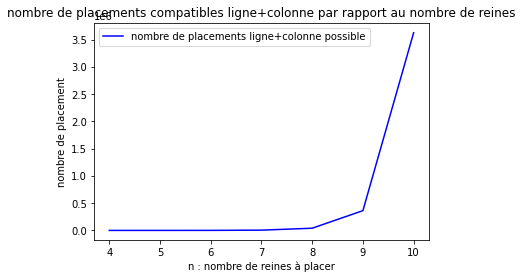

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

n = 10
x = [i for i in range (4, n+1)]
y = [0 for i in range (4, n+1)]
for i in range (4, n+1):
    nb_placement = len (generer_placements (i))
    y[i-4] = nb_placement
ax.plot(x, y,  color='blue', linestyle='solid', label='nombre de placements ligne+colonne possible')
plt.title("nombre de placements compatibles ligne+colonne par rapport au nombre de reines")
plt.legend(loc='upper left')
ax = ax.set (xlabel='n : nombre de reines à placer', ylabel= 'nombre de placement')

### Courbe 2 : nombre de solutions trouvées par rapport au nombre de reines

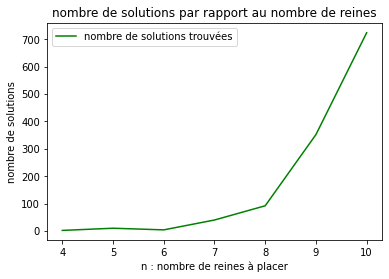

In [99]:
fig = plt.figure()
ax = plt.axes()

n = 10
x = [i for i in range (4, n+1)]
y = [0 for i in range (4, n+1)]
for i in range (4, n+1):
    nb_solutions = len (solutions(i))
    y[i-4] = nb_solutions
ax.plot(x, y,  color='green', linestyle='solid', label='nombre de solutions trouvées')
plt.title("nombre de solutions par rapport au nombre de reines")
plt.legend(loc='upper left')
ax = ax.set (xlabel='n : nombre de reines à placer', ylabel= 'nombre de solutions')

### Courbe 3 : temps d'exécution par rapport au nombre de reines

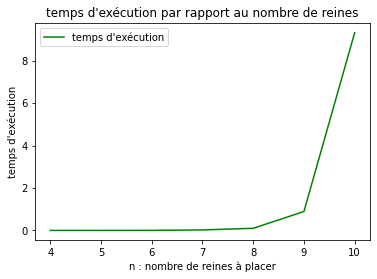

In [101]:
fig = plt.figure()
ax = plt.axes()

n = 10
x = [i for i in range (4, n+1)]
y = [0 for i in range (4, n+1)]
for i in range (4, n+1):
    start = time.time()
    nb_solutions = len (solutions(i))
    end = time.time()
    y[i-4] = end-start
ax.plot(x, y,  color='green', linestyle='solid', label="temps d'exécution")
plt.title("temps d'exécution par rapport au nombre de reines")
plt.legend(loc='upper left')
ax = ax.set (xlabel='n : nombre de reines à placer', ylabel= "temps d'exécution")

### Autres courbes et analyse 

A l'aide de nouveaux tracés, en particulier de ratios entre les différentes quantités jusque-là observées, effectuer une analyse de la difficulté de résoudre le problème des $n$ reines, de l'intérêt et des limites de l'algorithme "pas tout à fait" naïf utilisé pour déterminer toutes les solutions. 



In [ ]:
# ENTRER VOTRE CODE A LA PLACE DE CES 2 LIGNES
raise NotImplementedError()

**Votre analyse :**

> VOTRE REPONSE A LA PLACE DE CE TEXTE (format texte ou markdown)